In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
from statsmodels.formula.api import mixedlm
from statsmodels.stats.anova import AnovaRM
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import get_cmap
# from plot_utils import combined_rolling_average_and_model_fit, combined_sliding_window_and_model_fit_split_col
from common_functions import remove_unit_variance
import ptitprince as pt
from matplotlib.ticker import PercentFormatter

In [2]:
#!pip install seaborn==0.10
#!pip install ptitprince

In [3]:
blue = '#90BDEC'
gray = '#BFBFBF'

# Create a palette list
palette = [blue, gray]
sns.set_palette(palette) 

df = pd.read_csv('pilot_total.csv')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_cleaned = pd.read_csv('pilot_total_errors.csv')


category_mapping = {
    0: "Deprioritized Tested Item & High Reliability",
    1: "Deprioritized Tested Item & Low Reliability",
    2: "Prioritized Tested Item & Low Reliability",
    3: "Prioritized Tested Item & High Reliability"
}



# Map the numeric values to their descriptive labels
df['validity_reliability'] = df['validity_reliability'].map(category_mapping)
df_cleaned['validity_reliability'] = df_cleaned['validity_reliability'].map(category_mapping)

df_correct = df[df['resp_correct'] == 1]
#this approach here seems more correct
df_correct['wm_rt'] = df_correct['mouse.time_last'] * 1000
#df_correct['wm_rt'] = np.log(df_correct['mouse.time_last'])
#df_correct = remove_unit_variance(df_correct,'wm_rt', 'participant')
df_correct['WM RT'] = df_correct['wm_rt']


avg_scores = df.groupby(['validity_reliability','participant'])['resp_correct'].mean()
avg_scores_table = df.groupby(['participant', 'validity_reliability', 'Tested Item', 'Retrocue Reliability'])['resp_correct'].mean().reset_index()
avg_scores_table = avg_scores_table.rename(columns={'resp_correct': 'Average Score'})
avg_scores_table = avg_scores_table.rename(columns={'validity_reliability': 'Validity Reliability Group'})
avg_scores_table_rt = df_correct.groupby(['participant', 'validity_reliability',  'Tested Item', 'Retrocue Reliability'])['WM RT'].mean().reset_index()
avg_scores_table_rt = avg_scores_table_rt.rename(columns={'validity_reliability': 'Validity Reliability Group'})

# avg_scores_errors = df_cleaned.groupby(['validity_reliability','participant'])['resp_correct'].mean()
avg_scores_table_errors = df_cleaned.groupby(['participant', 'validity_reliability', 'Tested Item', 'Retrocue Reliability'])['wm_category_num'].mean().reset_index()
avg_scores_table_errors = avg_scores_table_errors.rename(columns={'wm_category_num': 'Average Error Score'})
avg_scores_table_errors = avg_scores_table_errors.rename(columns={'validity_reliability': 'Validity Reliability Group'})

# merged_table = avg_scores_table.merge(
#     avg_scores_table_rt,
#     on=['participant', 'Validity Reliability Group'],
#     how='outer',
#     indicator=True  # This adds a column showing which table each row came from
# )
# merged_table




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_2046/3491324359.py:8: DtypeWarning: Columns (254,255,256,257,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pilot_total.csv')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_2046/3491324359.py:10: DtypeWarning: Columns (157,254,255,256,257,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('pilot_total_errors.csv')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_2046/3491324359.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct['wm_rt'] = df_correct['mouse.time_last'] * 1000
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_2046/349

In [4]:
df_cleaned['validity_reliability']

0         Deprioritized Tested Item & Low Reliability
1          Prioritized Tested Item & High Reliability
2        Deprioritized Tested Item & High Reliability
3        Deprioritized Tested Item & High Reliability
4         Deprioritized Tested Item & Low Reliability
                             ...                     
17292     Deprioritized Tested Item & Low Reliability
17293      Prioritized Tested Item & High Reliability
17294       Prioritized Tested Item & Low Reliability
17295     Deprioritized Tested Item & Low Reliability
17296     Deprioritized Tested Item & Low Reliability
Name: validity_reliability, Length: 17297, dtype: object

In [5]:
len(set(df['participant']))

270

In [6]:

grey = '#BFBFBF'
blue = '#6cbcef'
teal = '#49a791'
purple = '#a271b1'
salmon = '#e58a72'
gold = '#dbad40'
green = '#95c355'

In [7]:
sns.set_context('notebook')

In [8]:
# blue = '#90BDEC'
# gray = '#BFBFBF'

# Create a palette list
palette = [blue, gray]
sns.set_palette(palette)  # Set as default palette


In [9]:
# missing_rt = merged_table[merged_table['WM RT'].isna()]
# missing_rt

Text(0.5, 1.0, 'Figure P8\n Rainclouds with Shifted Rain')

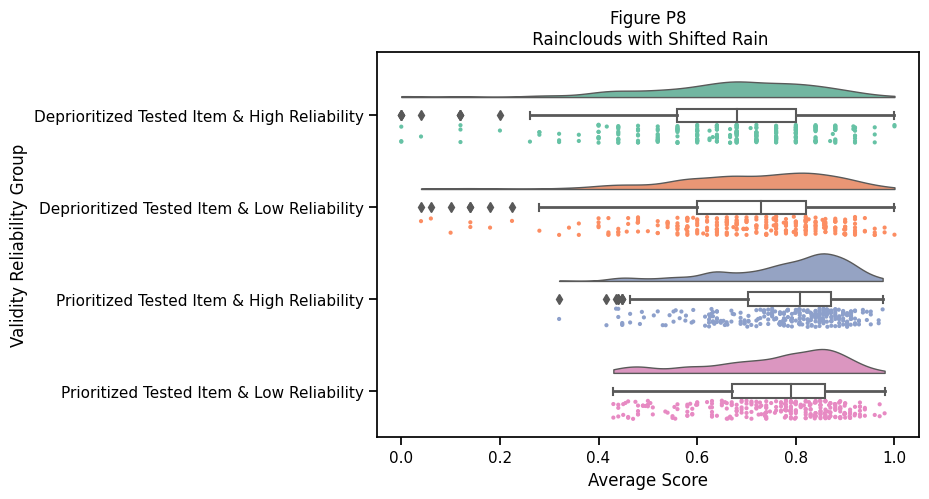

In [10]:
dx = "Validity Reliability Group"; dy = "Average Score"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = avg_scores_table, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort, move = .2)

plt.title("Figure P8\n Rainclouds with Shifted Rain")


Text(0.5, 1.0, 'Figure P18\n Shifting the Rain with the Move Parameter')

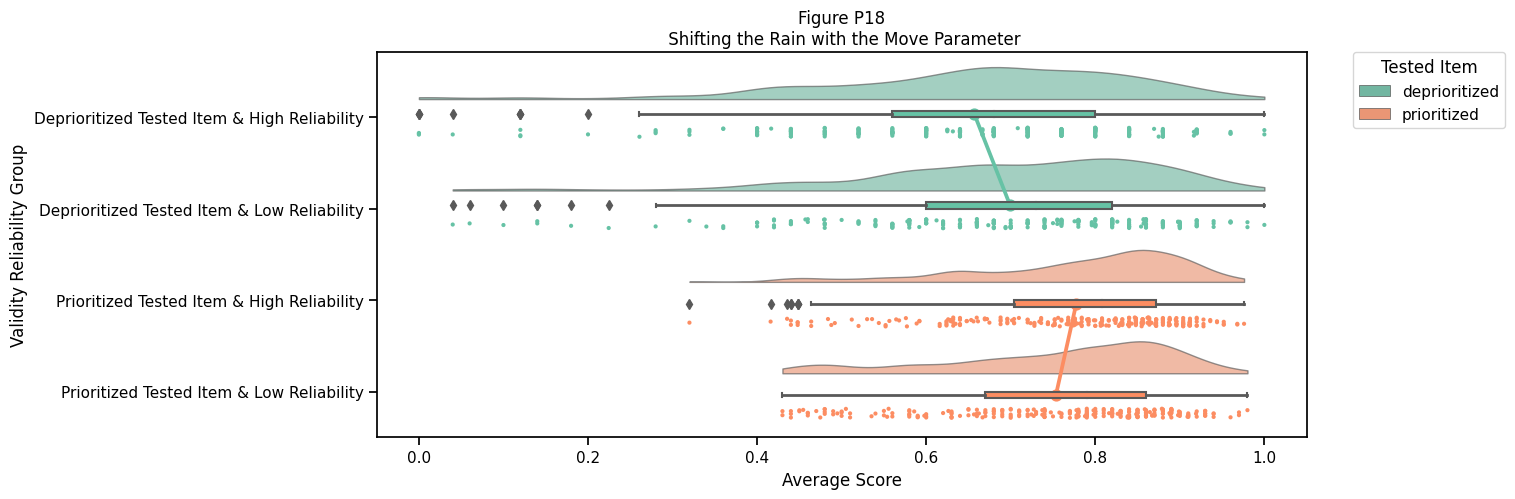

In [11]:
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = dx, y = dy, hue = 'Tested Item', data = avg_scores_table, palette = pal, bw = sigma, width_viol = .7,
                ax = ax, orient = ort , alpha = .65, dodge = True, pointplot = True, move = .2)

plt.title("Figure P18\n Shifting the Rain with the Move Parameter")

Text(0.5, 1.0, 'Figure P14\n Rainclouds with Subgroups')

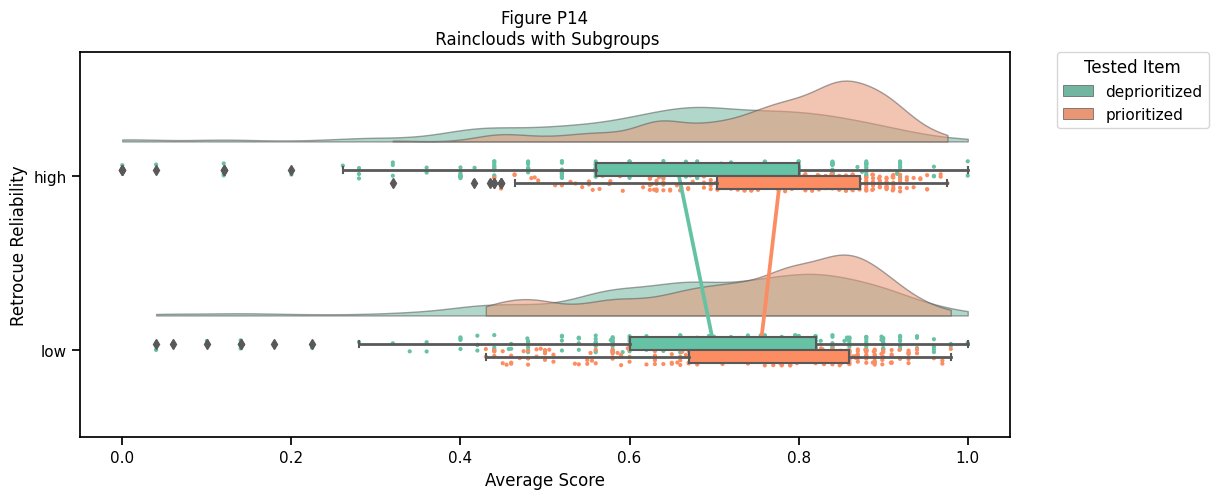

In [12]:
ort="h"
pal = "Set2"
sigma = .2
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = 'Retrocue Reliability', y = dy, hue = 'Tested Item', data = avg_scores_table, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort, alpha = .55, dodge = True, pointplot = True)

plt.title("Figure P14\n Rainclouds with Subgroups")

Text(0.5, 1.0, 'Figure P14\n Rainclouds with Subgroups')

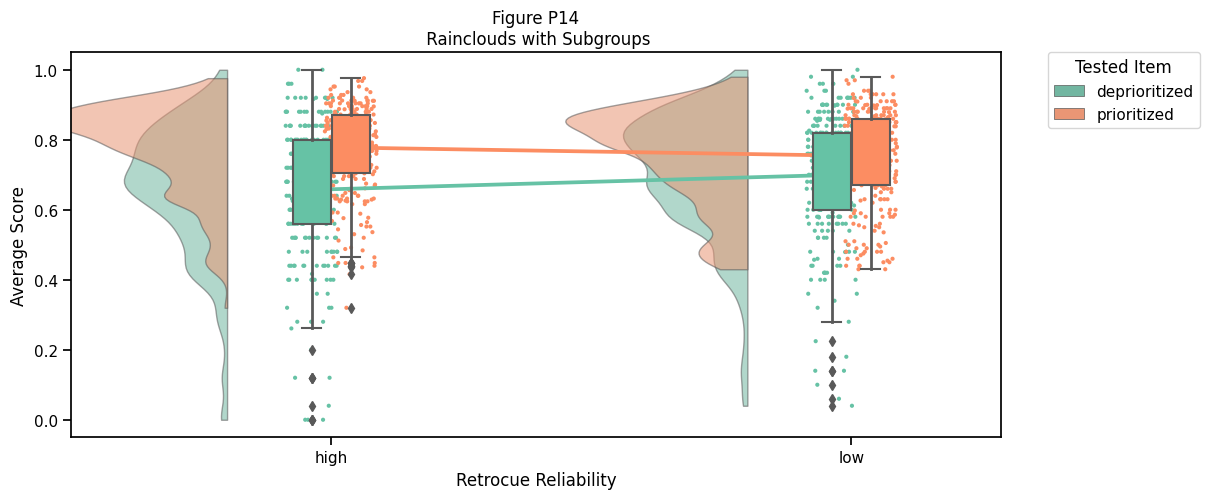

In [13]:
ort = "v"
pal = "Set2"
sigma = .2
f, ax = plt.subplots(figsize=(12, 5))

ax=pt.RainCloud(x = 'Retrocue Reliability', y = dy, hue = 'Tested Item', data = avg_scores_table, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort, alpha = .55, dodge = True, pointplot = True)

plt.title("Figure P14\n Rainclouds with Subgroups")

Text(0.5, 1.0, 'Figure P14\n Rainclouds with Subgroups')

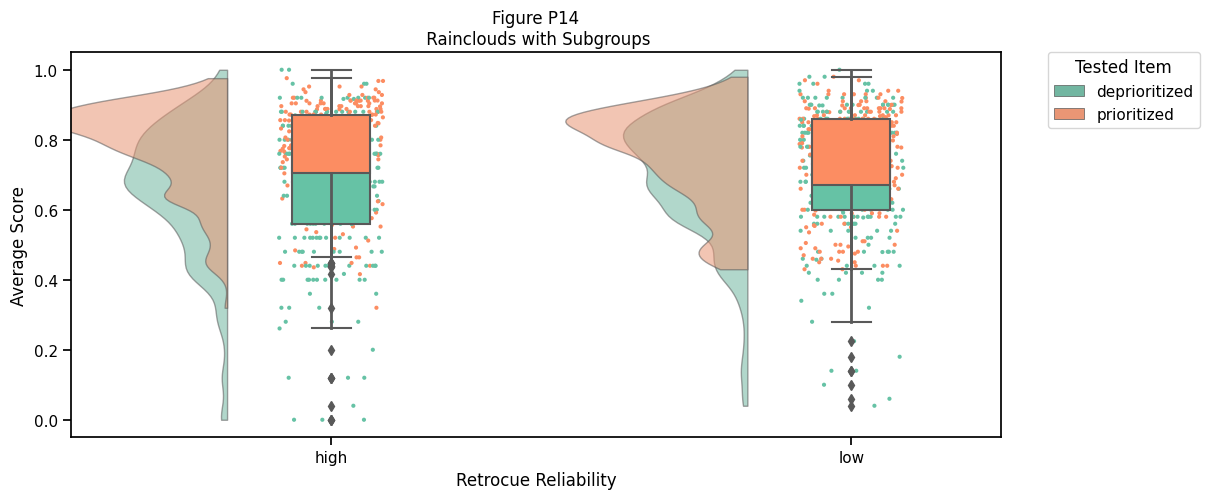

In [14]:
ort = "v"
pal = "Set2"
sigma = .2
f, ax = plt.subplots(figsize=(12, 5))
dhue = 'Tested Item'
dx = 'Retrocue Reliability'
dy = "Average Score"
ax=pt.RainCloud(x = dx, y = dy, hue = dhue, data = avg_scores_table, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort, alpha = .55)

plt.title("Figure P14\n Rainclouds with Subgroups")

Artists: 0
Patches: 8
Collections: 8
Lines: 24


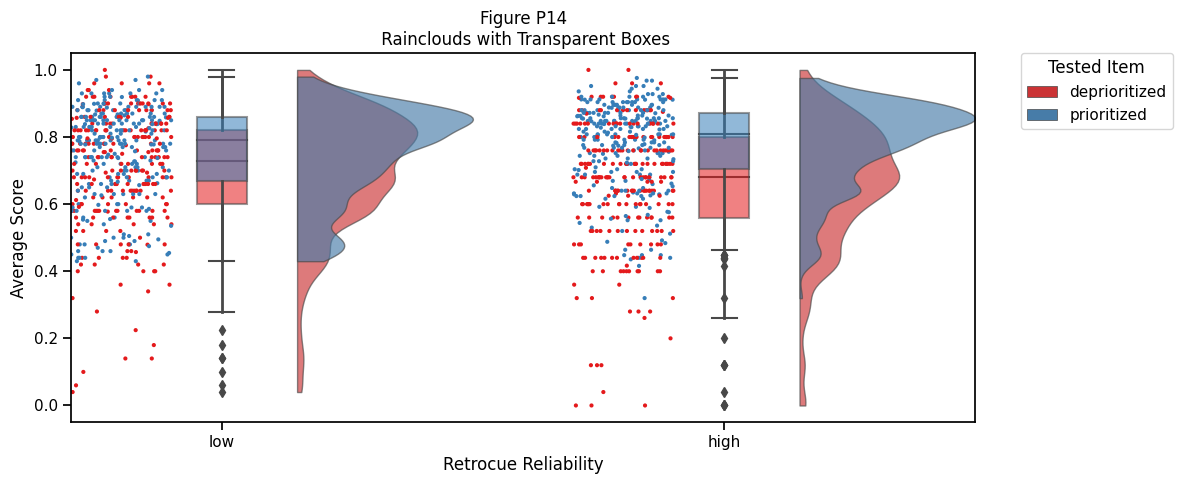

In [15]:
# Set up the figure
ort = "v"  # Vertical orientation
pal = "Set1"
# sigma = .2
f, ax = plt.subplots(figsize=(12, 5))
dhue = 'Tested Item'
dx = 'Retrocue Reliability'
dy = 'Average Score'

# Create the RainCloud plot with basic parameters
ax = pt.RainCloud(
    x=dx, y=dy, hue=dhue, data=avg_scores_table, 
    palette=pal, bw=sigma,
    width_viol=.7,            # Width of the violin part
    width_box=.1,            # Width of the boxplot
    move=.2,                  # Move points away from boxes
    offset=.15,               # Space between violins and boxes
    ax=ax, 
    orient=ort,               # Vertical orientation
    alpha=.65                  # Overall transparency
)

# Now modify the box plots after they're created
# Loop through all the boxes in the plot
for box in ax.artists:
    box.set_facecolor('none')
    
if ort == "v":
    # Get current x-axis limits
    xlim = ax.get_xlim()
    # Set new limits to flip the plot horizontally
    ax.set_xlim(xlim[1], xlim[0])
plt.title("Figure P14\n Rainclouds with Transparent Boxes")
plt.tight_layout()

# Debug: Let's see what's in the plot
print("Artists:", len(ax.artists))
print("Patches:", len(ax.patches))
print("Collections:", len(ax.collections))
print("Lines:", len(ax.lines))

# Method 1: Try all patches (most likely location for boxes)
for patch in ax.patches:
    # patch.set_facecolor('none')
    patch.set_alpha(0.55)

yeah, but just be sure to use the same format for all of the plots of the same type  (e.g., low reliability first on the axis), cause these flips end up confusing me a lot. and make them each the same size/aspect ratio, so they're comparable

so, we're at the point where we're actually trying to get these close to the version that would go in a paper, which means you want to start adjusting things like font size and line weight, for aesthetic purposes

the boxes look nice, but I would still make the box part a little narrower, make the error bar a little heavier but maybe in grey instead of black, and use that blue-grey color scheme like we discussed (prioritized blue), and increase the font sizes for readability

also make a comparable set of the kind without the boxes (the one with just the mean line, for all 3 measures) -- maybe make the data point swarm a bit narrower and make the mean line a little heavier

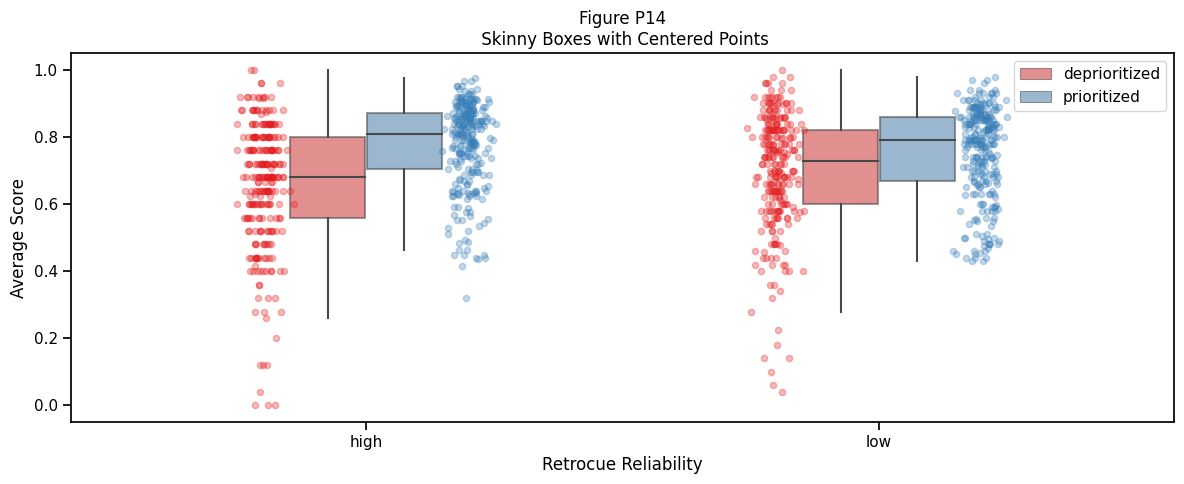

In [16]:

f, ax = plt.subplots(figsize=(12, 5))

# Create skinnier box plots
sns.boxplot(
    data=avg_scores_table, 
    x=dx, y=dy, hue=dhue,
    palette=pal,
    ax=ax,
    showfliers=False,    # Remove outliers
    showcaps=False,      # Remove caps
    width=0.3            # Even skinnier boxes
)

# Manually position points under each box
unique_x = avg_scores_table[dx].unique()
unique_hue = avg_scores_table[dhue].unique()
colors = sns.color_palette(pal, n_colors=len(unique_hue))

for i, x_val in enumerate(unique_x):
    for j, hue_val in enumerate(unique_hue):
        # Filter data for this combination
        subset = avg_scores_table[(avg_scores_table[dx] == x_val) & 
                                 (avg_scores_table[dhue] == hue_val)]
        
        # Calculate x position (centered under each box)
        x_pos = i + (j - 0.5) * 0.4  # Adjust 0.4 for spacing between hue groups
        
        # Add jitter for visibility
        x_jitter = np.random.normal(x_pos, 0.02, len(subset))
        
        # Plot points
        ax.scatter(x_jitter, subset[dy], 
                  color=colors[j], alpha=0.3, s=20, zorder=10)

# Make box faces transparent
for patch in ax.patches:
    patch.set_alpha(0.55)

# Remove legend duplication and fix it
handles, labels = ax.get_legend_handles_labels()
n_items = len(avg_scores_table[dhue].unique())
ax.legend(handles[:n_items], labels[:n_items])

plt.title("Figure P14\n Skinny Boxes with Centered Points")
plt.tight_layout()
plt.show()

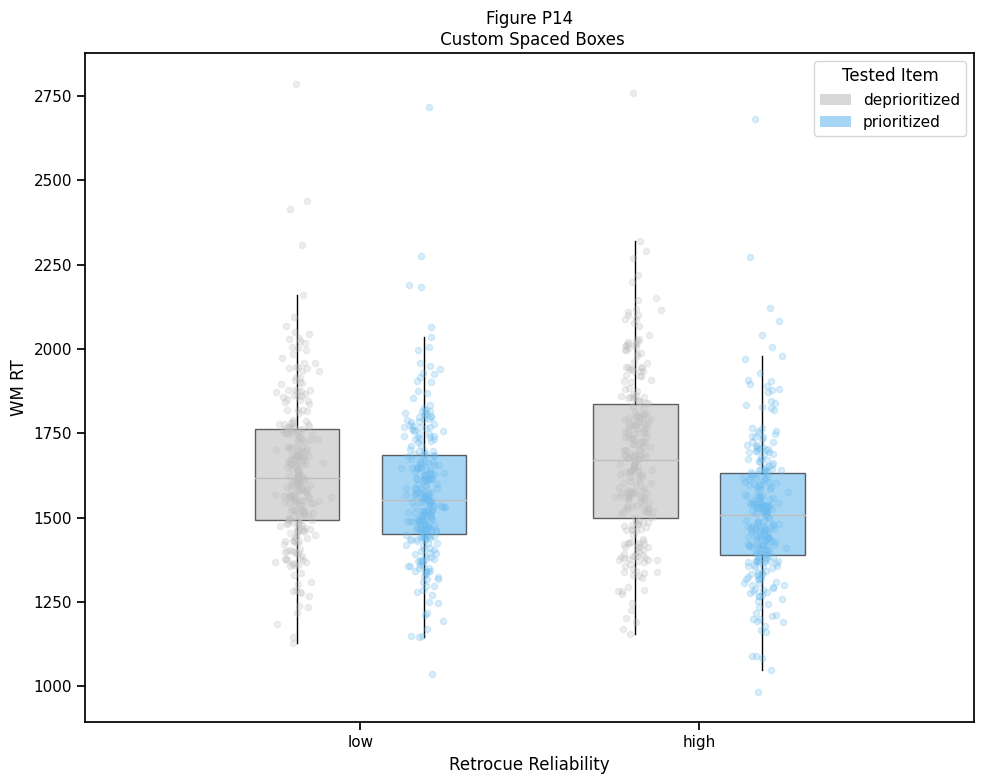

In [17]:
f, ax = plt.subplots(figsize=(10, 8))  # Square plot
dhue = 'Tested Item'
dx = 'Retrocue Reliability'
dy = 'WM RT'


# Rest of the code stays the same...
unique_x = sorted(avg_scores_table_rt[dx].unique(), reverse=True)  
unique_hue = sorted(avg_scores_table_rt[dhue].unique())
colors = sns.color_palette(palette[::-1], n_colors=len(unique_hue))

# Manual positioning with more space
spacing = 0.8  # Increase this for more space between categories
hue_offset = 0.3  # Space between hue groups within category

for i, x_val in enumerate(unique_x):
    for j, hue_val in enumerate(unique_hue):
        subset = avg_scores_table_rt[(avg_scores_table_rt[dx] == x_val) & 
                                 (avg_scores_table_rt[dhue] == hue_val)]
        
        if len(subset) > 0:
            x_pos = i * spacing + (j - len(unique_hue)/2 + 0.5) * hue_offset
            
            bp = ax.boxplot([subset[dy].values], 
                          positions=[x_pos], 
                          widths=0.2,
                          patch_artist=True,
                          showfliers=False,
                          showcaps=False)
            
            bp['boxes'][0].set_facecolor(colors[j])
            bp['boxes'][0].set_alpha(0.6)
            
            x_jitter = np.random.normal(x_pos, 0.02, len(subset))
            ax.scatter(x_jitter, subset[dy], 
                      color=colors[j], alpha=0.25, s=20, zorder=10)

# Set x-axis
ax.set_xticks([i * spacing for i in range(len(unique_x))])
ax.set_xticklabels(unique_x)
ax.set_xlabel(dx)
ax.set_ylabel(dy)

# Create legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], alpha=0.6, label=hue_val) 
                   for i, hue_val in enumerate(unique_hue)]
ax.legend(handles=legend_elements, title=dhue)

plt.title("Figure P14\n Custom Spaced Boxes")
plt.tight_layout()
plt.show()


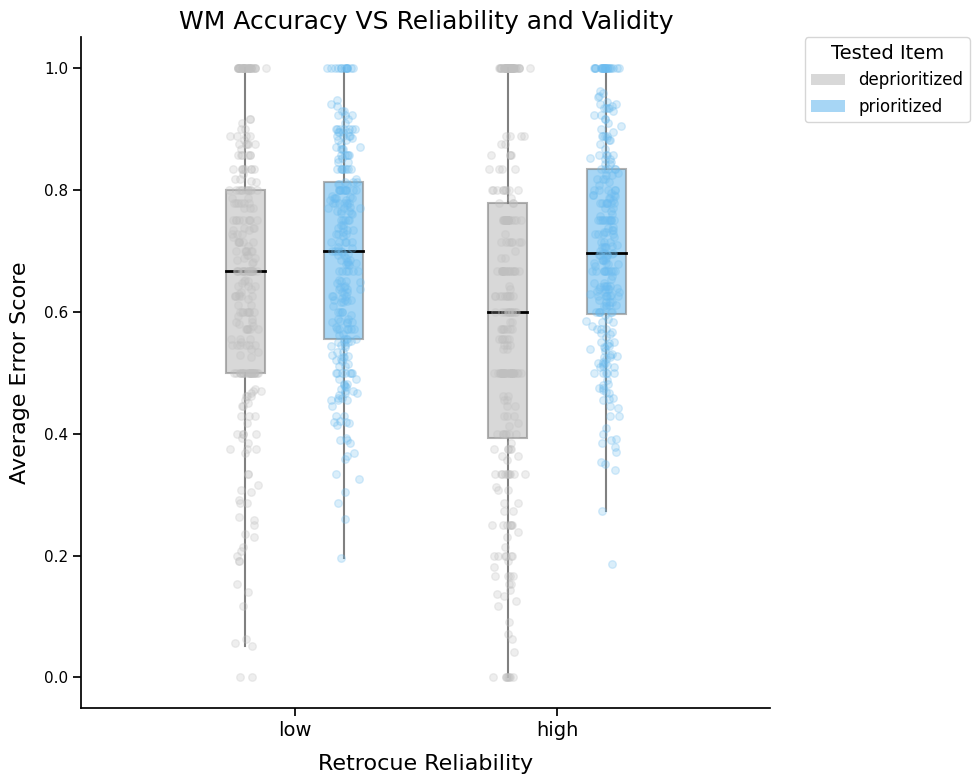

In [18]:


f, ax = plt.subplots(figsize=(10, 8))
dhue = 'Tested Item'
dx = 'Retrocue Reliability'
dy = 'Average Error Score'

# Sort values
unique_x = sorted(avg_scores_table_errors[dx].unique(), reverse=True)
unique_hue = sorted(avg_scores_table_errors[dhue].unique())

# Define color palette
colors = sns.color_palette(palette[::-1], n_colors=len(unique_hue))

# Plot layout settings
spacing = 0.8
hue_offset = 0.3
box_width = 0.12

# Draw boxplots and scatter
for i, x_val in enumerate(unique_x):
    for j, hue_val in enumerate(unique_hue):
        subset = avg_scores_table_errors[(avg_scores_table_errors[dx] == x_val) & 
                                     (avg_scores_table_errors[dhue] == hue_val)]
        if len(subset) > 0:
            x_pos = i * spacing + (j - len(unique_hue)/2 + 0.5) * hue_offset

            bp = ax.boxplot([subset[dy].values],
                            positions=[x_pos],
                            widths=box_width,
                            patch_artist=True,
                            showfliers=False,
                            showcaps=False,
                            boxprops=dict(color='gray', linewidth=1.5),
                            whiskerprops=dict(color='gray', linewidth=1.5),
                            medianprops=dict(color='black', linewidth=2))

            bp['boxes'][0].set_facecolor(colors[j])
            bp['boxes'][0].set_alpha(0.6)

            x_jitter = np.random.normal(x_pos, 0.02, len(subset))
            ax.scatter(x_jitter, subset[dy],
                       color=colors[j], alpha=0.25, s=30, zorder=10)

# Clean up axes and labels
ax.set_xticks([i * spacing for i in range(len(unique_x))])
ax.set_xticklabels(unique_x, fontsize=14)
ax.set_xlabel(dx, fontsize=16, labelpad=10)
ax.set_ylabel(dy, fontsize=16, labelpad=10)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Move legend outside the plot to the right
legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], alpha=0.6, label=hue_val)
                   for i, hue_val in enumerate(unique_hue)]
ax.legend(handles=legend_elements, title=dhue,
          title_fontsize=14, fontsize=12,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# Title and layout
plt.title("WM Accuracy VS Reliability and Validity", fontsize=18)
plt.tight_layout()
plt.show()


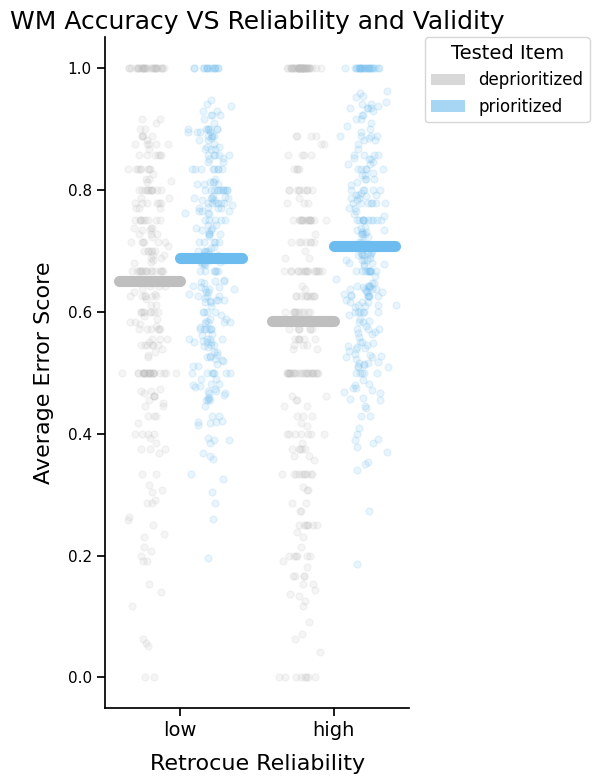

In [19]:
f, ax = plt.subplots(figsize=(6, 8))  # Square plot

dhue = 'Tested Item'
dx = 'Retrocue Reliability'
dy = 'Average Error Score'
# Get unique values
# Sort values
unique_x = sorted(avg_scores_table_errors[dx].unique(), reverse=True)
unique_hue = sorted(avg_scores_table_errors[dhue].unique())

# Define color palette
colors = sns.color_palette(palette[::-1], n_colors=len(unique_hue))

# Manual positioning with more space
spacing = 0.5  # Increase this for more space between categories
hue_offset = 0.2  # Space between hue groups within category

for i, x_val in enumerate(unique_x):
    for j, hue_val in enumerate(unique_hue):
        # Filter data for this combination
        subset = avg_scores_table_errors[(avg_scores_table_errors[dx] == x_val) & 
                                 (avg_scores_table_errors[dhue] == hue_val)]
        
        if len(subset) > 0:
            # Calculate x position with more spacing
            x_pos = i * spacing + (j - len(unique_hue)/2 + 0.5) * hue_offset
            
            # Add transparent individual points with jitter
            x_jitter = np.random.normal(x_pos, 0.03, len(subset))
            ax.scatter(x_jitter, subset[dy], 
                      color=colors[j], alpha=0.15, s=25, zorder=1)
            
            # Calculate and plot bold mean line
            mean_value = subset[dy].mean()
            ax.plot([x_pos - 0.1, x_pos + 0.1], [mean_value, mean_value], 
                   color=colors[j], linewidth=8, solid_capstyle='round', zorder=10)
# Clean up axes and labels
ax.set_xticks([i * spacing for i in range(len(unique_x))])
ax.set_xticklabels(unique_x, fontsize=14)
ax.set_xlabel(dx, fontsize=16, labelpad=10)
ax.set_ylabel(dy, fontsize=16, labelpad=10)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Move legend outside the plot to the right
legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], alpha=0.6, label=hue_val)
                   for i, hue_val in enumerate(unique_hue)]
ax.legend(handles=legend_elements, title=dhue,
          title_fontsize=14, fontsize=12,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# Title and layout
plt.title("WM Accuracy VS Reliability and Validity", fontsize=18)
plt.tight_layout()
plt.show()


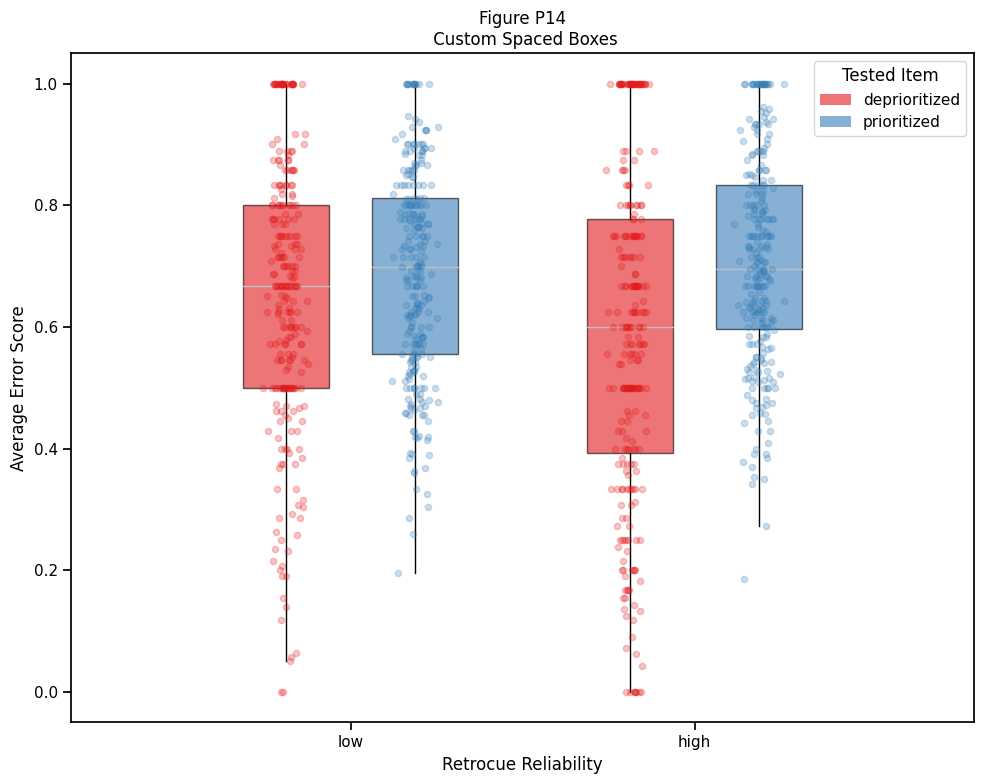

In [20]:
f, ax = plt.subplots(figsize=(10, 8))  # Square plot
dhue = 'Tested Item'
dx = 'Retrocue Reliability'
dy = "Average Error Score"


# Rest of the code stays the same...
unique_x = sorted(avg_scores_table_errors[dx].unique(), reverse=True)  
unique_hue = sorted(avg_scores_table_errors[dhue].unique())
colors = sns.color_palette(pal, n_colors=len(unique_hue))


spacing = 0.8  # Increase this for more space between categories
hue_offset = 0.3  # Space between hue groups within category

for i, x_val in enumerate(unique_x):
    for j, hue_val in enumerate(unique_hue):
        subset = avg_scores_table_errors[(avg_scores_table_errors[dx] == x_val) & 
                                 (avg_scores_table_errors[dhue] == hue_val)]
        
        if len(subset) > 0:
            x_pos = i * spacing + (j - len(unique_hue)/2 + 0.5) * hue_offset
            
            bp = ax.boxplot([subset[dy].values], 
                          positions=[x_pos], 
                          widths=0.2,
                          patch_artist=True,
                          showfliers=False,
                          showcaps=False)
            
            bp['boxes'][0].set_facecolor(colors[j])
            bp['boxes'][0].set_alpha(0.6)
            
            x_jitter = np.random.normal(x_pos, 0.02, len(subset))
            ax.scatter(x_jitter, subset[dy], 
                      color=colors[j], alpha=0.25, s=20, zorder=10)

# Set x-axis
ax.set_xticks([i * spacing for i in range(len(unique_x))])
ax.set_xticklabels(unique_x)
ax.set_xlabel(dx)
ax.set_ylabel(dy)

# Create legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], alpha=0.6, label=hue_val) 
                   for i, hue_val in enumerate(unique_hue)]
ax.legend(handles=legend_elements, title=dhue)

plt.title("Figure P14\n Custom Spaced Boxes")
plt.tight_layout()
plt.show()



In [21]:
dep_low = avg_scores_table[(avg_scores_table['Tested Item'] == 'deprioritized') & (avg_scores_table['Retrocue Reliability'] == 'low') ]
dep_low

dep_high = avg_scores_table[(avg_scores_table['Tested Item'] == 'deprioritized') & (avg_scores_table['Retrocue Reliability'] == 'high') ]
dep_high

,participant,Validity Reliability Group,Tested Item,Retrocue Reliability,Average Score
0,116851,Deprioritized Tested Item & High Reliability,deprioritized,high,1.000000
4,121021,Deprioritized Tested Item & High Reliability,deprioritized,high,0.720000
8,123262,Deprioritized Tested Item & High Reliability,deprioritized,high,0.720000
12,123790,Deprioritized Tested Item & High Reliability,deprioritized,high,0.800000
16,123985,Deprioritized Tested Item & High Reliability,deprioritized,high,0.520000
...,...,...,...,...,...
1060,170536,Deprioritized Tested Item & High Reliability,deprioritized,high,0.680000
1064,170665,Deprioritized Tested Item & High Reliability,deprioritized,high,0.120000
1068,171031,Deprioritized Tested Item & High Reliability,deprioritized,high,0.880000
1072,171253,Deprioritized Tested Item & High Reliability,deprioritized,high,0.640000


In [22]:
pr_low = avg_scores_table[(avg_scores_table['Tested Item'] == 'prioritized') & (avg_scores_table['Retrocue Reliability'] == 'low') ]
pr_low

,participant,Validity Reliability Group,Tested Item,Retrocue Reliability,Average Score
3,116851,Prioritized Tested Item & Low Reliability,prioritized,low,0.920000
7,121021,Prioritized Tested Item & Low Reliability,prioritized,low,0.830000
11,123262,Prioritized Tested Item & Low Reliability,prioritized,low,0.740000
15,123790,Prioritized Tested Item & Low Reliability,prioritized,low,0.790000
19,123985,Prioritized Tested Item & Low Reliability,prioritized,low,0.454545
...,...,...,...,...,...
1063,170536,Prioritized Tested Item & Low Reliability,prioritized,low,0.555556
1067,170665,Prioritized Tested Item & Low Reliability,prioritized,low,0.740000
1071,171031,Prioritized Tested Item & Low Reliability,prioritized,low,0.820000
1075,171253,Prioritized Tested Item & Low Reliability,prioritized,low,0.670000


In [23]:
pr_high = avg_scores_table[(avg_scores_table['Tested Item'] == 'prioritized') & (avg_scores_table['Retrocue Reliability'] == 'high') ]
pr_high

,participant,Validity Reliability Group,Tested Item,Retrocue Reliability,Average Score
2,116851,Prioritized Tested Item & High Reliability,prioritized,high,0.888000
6,121021,Prioritized Tested Item & High Reliability,prioritized,high,0.840000
10,123262,Prioritized Tested Item & High Reliability,prioritized,high,0.848000
14,123790,Prioritized Tested Item & High Reliability,prioritized,high,0.848000
18,123985,Prioritized Tested Item & High Reliability,prioritized,high,0.616000
...,...,...,...,...,...
1062,170536,Prioritized Tested Item & High Reliability,prioritized,high,0.616000
1066,170665,Prioritized Tested Item & High Reliability,prioritized,high,0.800000
1070,171031,Prioritized Tested Item & High Reliability,prioritized,high,0.782258
1074,171253,Prioritized Tested Item & High Reliability,prioritized,high,0.624000


In [24]:
dep_low['Average Score'].unique()

array([0.96      , 0.84      , 0.6       , 0.58      , 0.47916667,
       0.76      , 0.44      , 0.64      , 0.36      , 0.78      ,
       0.68      , 0.92      , 0.72      , 0.82      , 0.8       ,
       0.74      , 0.56      , 0.42      , 0.46      , 0.7       ,
       0.86      , 0.98      , 0.75      , 0.48      , 0.9       ,
       0.66      , 0.62      , 0.32      , 0.4       , 0.7755102 ,
       1.        , 0.54      , 0.88      , 0.6122449 , 0.28      ,
       0.06      , 0.34      , 0.89795918, 0.67346939, 0.18      ,
       0.52      , 0.57777778, 0.45714286, 0.75510204, 0.79591837,
       0.14      , 0.2244898 , 0.85416667, 0.85714286, 0.69387755,
       0.94      , 0.82608696, 0.59183673, 0.1       , 0.04      ,
       0.5       ])

In [25]:
# also, try to match the style of the thing i copied -- include a line
#     for the median (or mean), separate points from boxes, put distributions on the right






In [26]:
len(set(dep_high['Average Score'].unique()))

32

In [27]:
len(set(pr_high['Average Score'].unique()))

102

In [28]:
len(set(pr_low['Average Score'].unique()))

87

In [29]:
np.sort(dep_high['Average Score'].unique())

array([0.        , 0.04      , 0.12      , 0.2       , 0.26086957,
       0.28      , 0.32      , 0.36      , 0.4       , 0.41666667,
       0.44      , 0.48      , 0.52      , 0.56      , 0.6       ,
       0.625     , 0.63157895, 0.64      , 0.66666667, 0.68      ,
       0.70833333, 0.72      , 0.76      , 0.8       , 0.84      ,
       0.86956522, 0.875     , 0.88      , 0.91666667, 0.92      ,
       0.96      , 1.        ])

      participant                          validity_reliability  trials_count
0          116851  Deprioritized Tested Item & High Reliability            25
1          116851   Deprioritized Tested Item & Low Reliability            50
2          116851    Prioritized Tested Item & High Reliability           125
3          116851     Prioritized Tested Item & Low Reliability           100
4          121021  Deprioritized Tested Item & High Reliability            25
...           ...                                           ...           ...
1075       171253     Prioritized Tested Item & Low Reliability           100
1076       171304  Deprioritized Tested Item & High Reliability            24
1077       171304   Deprioritized Tested Item & Low Reliability            50
1078       171304    Prioritized Tested Item & High Reliability           125
1079       171304     Prioritized Tested Item & Low Reliability           100

[1080 rows x 3 columns]


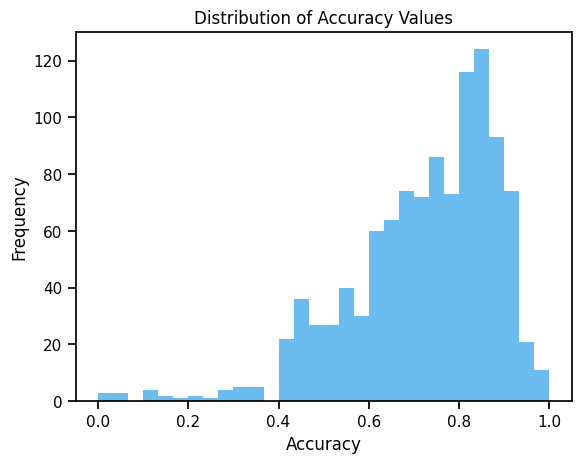

In [30]:
trials_count = df.groupby(['participant', 'validity_reliability']).size().reset_index(name='trials_count')
print(trials_count)

# Check the distribution of your accuracy values
import matplotlib.pyplot as plt
plt.hist(avg_scores.values, bins=30)
plt.title('Distribution of Accuracy Values')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


In [31]:
merged_table = avg_scores_table.merge(
    avg_scores_table_rt,
    left_on=['participant', 'Validity Reliability Group'],
    right_on=['participant', 'Validity Reliability Group'],
    how='left',
    suffixes=('', '_drop')  # Keep original column names for left dataframe, add '_drop' to right
)
cols_to_drop = [col for col in merged_table.columns if col.endswith('_drop')]
merged_table = merged_table.drop(columns=cols_to_drop )


merged_table.to_csv('avg_scores_table.csv', index=False)


In [32]:
merged_table

,participant,Validity Reliability Group,Tested Item,Retrocue Reliability,Average Score,WM RT
0,116851,Deprioritized Tested Item & High Reliability,deprioritized,high,1.000000,1528.160000
1,116851,Deprioritized Tested Item & Low Reliability,deprioritized,low,0.960000,1596.577083
2,116851,Prioritized Tested Item & High Reliability,prioritized,high,0.888000,1355.020721
3,116851,Prioritized Tested Item & Low Reliability,prioritized,low,0.920000,1493.615217
4,121021,Deprioritized Tested Item & High Reliability,deprioritized,high,0.720000,1534.622222
...,...,...,...,...,...,...
1075,171253,Prioritized Tested Item & Low Reliability,prioritized,low,0.670000,1904.731343
1076,171304,Deprioritized Tested Item & High Reliability,deprioritized,high,0.708333,1347.947059
1077,171304,Deprioritized Tested Item & Low Reliability,deprioritized,low,0.860000,1621.255814
1078,171304,Prioritized Tested Item & High Reliability,prioritized,high,0.824000,1513.118447


In [33]:
df_x = df[df['participant'] == 149656]
# df_x['Tested Item']
df_y = df_x[df_x['Tested Item'] == 'deprioritized']
df_z = df_y[df_y['Retrocue Reliability'] == 'high']
df_z['last_clicked']

53096    distractor_mem_stim
53127    distractor_mem_stim
53128    distractor_mem_stim
53131    distractor_mem_stim
53154    distractor_mem_stim
53174    distractor_mem_stim
53182    distractor_mem_stim
53185    distractor_mem_stim
53199    distractor_mem_stim
53202    distractor_mem_stim
53203    distractor_mem_stim
53211    distractor_mem_stim
53241    distractor_mem_stim
53286    distractor_mem_stim
53324    distractor_mem_stim
53326    distractor_mem_stim
53327    distractor_mem_stim
53331    distractor_mem_stim
53333    distractor_mem_stim
53336        distractor_im_2
53356    distractor_mem_stim
53359        distractor_im_0
53371    distractor_mem_stim
53377    distractor_mem_stim
53389    distractor_mem_stim
Name: last_clicked, dtype: object

In [34]:
!pwd

/Users/lana/Desktop/psychoPyExperiments/wm_deepgen_full


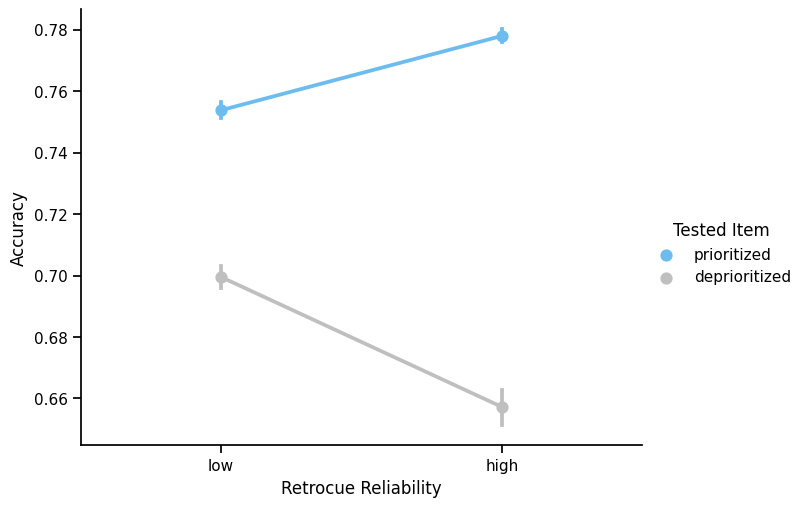

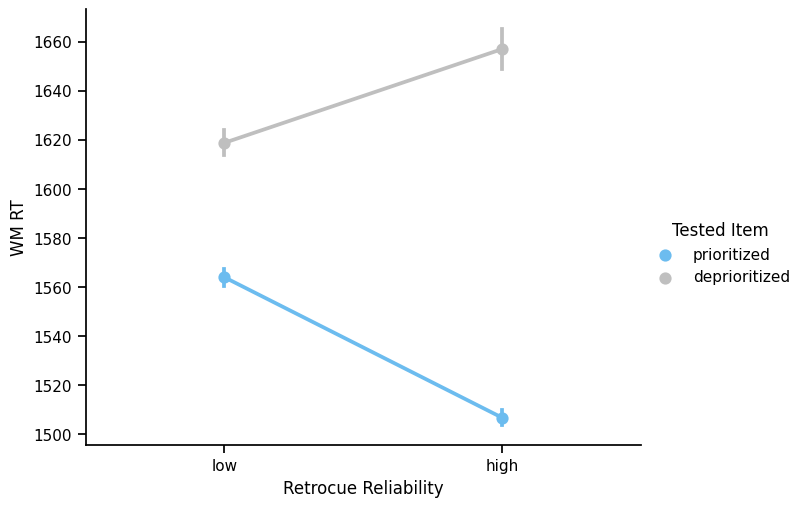

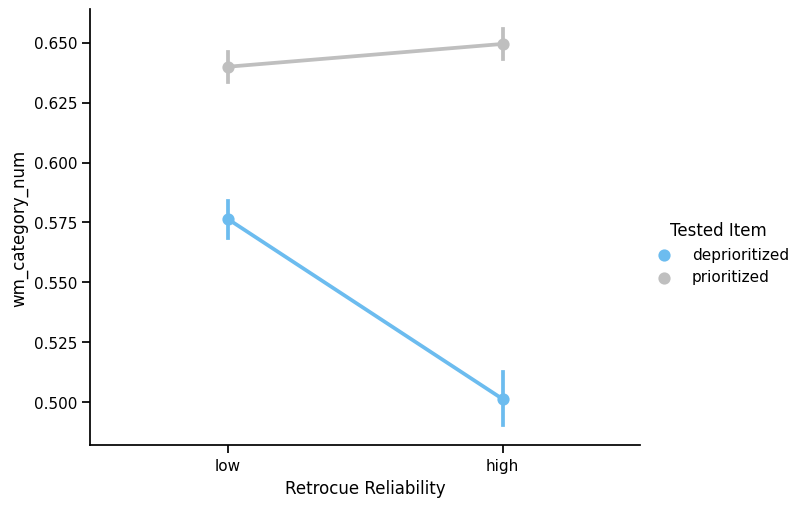

In [35]:
g = sns.catplot(
            x = 'Retrocue Reliability' ,
            y='Accuracy',
            hue = 'Tested Item',
            ci = 68,       
            aspect = 1.3,
            kind = 'point',
            data = df)

g = sns.catplot(
            x = 'Retrocue Reliability' ,
            y='WM RT',
            hue = 'Tested Item',
            ci = 68,       
            aspect = 1.3,
            kind = 'point',
            data = df_correct)

g = sns.catplot(
            x = 'Retrocue Reliability' ,
            y='wm_category_num',
            hue = 'Tested Item',
            ci = 68,       
            aspect = 1.3,
            kind = 'point',
            data = df_cleaned)

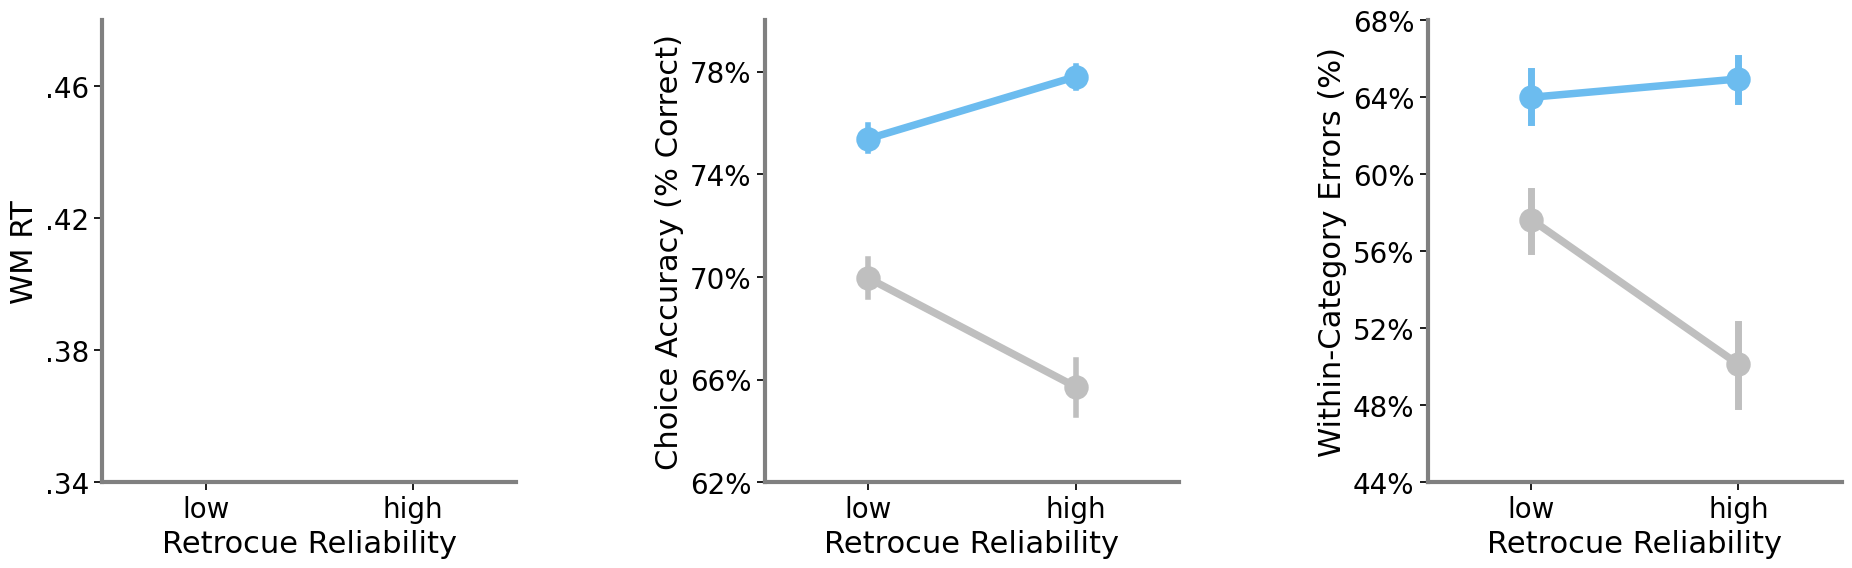

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
colors = {'prioritized': blue, 'deprioritized': grey}
df_plot1 = df.copy()
df_plot1['Accuracy_pct'] = df_plot1['Accuracy'] * 100

# First plot - WM RT
sns.pointplot(
    x='Retrocue Reliability',
    y='WM RT',
    hue='Tested Item',
    ci=95,
    data=df_correct,
    ax=axes[0],
    palette=colors,
    scale=2,
    errwidth=4,
    legend=False
)
axes[0].set_ylabel('WM RT', fontsize=22)
axes[0].set_xlabel('Retrocue Reliability', fontsize=22)
axes[0].tick_params(axis='both', which='major', labelsize=20)
axes[0].set_ylim(0.34, 0.48)
axes[0].set_yticks(np.arange(0.34, 0.49, 0.04))
# Format y-tick labels to remove leading zero
current_labels = [f"{float(tick):.2f}" for tick in axes[0].get_yticks()]
axes[0].set_yticklabels([label.lstrip('0') if label.startswith('0.') else label for label in current_labels])
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['left'].set_color('grey')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].legend().set_visible(False) if axes[0].get_legend() else None

# Second plot - Accuracy
sns.pointplot(
    x='Retrocue Reliability',
    y='Accuracy_pct',
    hue='Tested Item',
    ci=95,
    data=df_plot1,
    ax=axes[1],
    palette=colors,
    linewidth=2,
    scale=2,
    errwidth=4,
    legend=False
)
axes[1].set_ylabel('Choice Accuracy (% Correct)', fontsize=22)
axes[1].set_xlabel('Retrocue Reliability', fontsize=22)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].set_ylim(62, 80)
axes[1].set_yticks(np.arange(62, 81, 4))
current_labels = [label.get_text() for label in axes[1].get_yticklabels()]
axes[1].set_yticklabels([f'{label}%' for label in current_labels])
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['left'].set_color('grey')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].legend().set_visible(False) if axes[1].get_legend() else None

df_plot3 = df_cleaned.copy()
df_plot3['Average Error Score'] = df_plot3['wm_category_num'] * 100  
sns.pointplot(
    x='Retrocue Reliability',
    y='Average Error Score',
    hue='Tested Item',
    ci=95,
    data=df_plot3,
    scale=2,
    ax=axes[2],
    palette=colors,
    errwidth=5,
    legend=False
)
axes[2].set_ylabel('Within-Category Errors (%)', fontsize=22)
axes[2].set_xlabel('Retrocue Reliability', fontsize=22)
axes[2].tick_params(axis='both', which='major', labelsize=20)
axes[2].set_ylim(44, 68)
axes[2].set_yticks(np.arange(44, 69, 4))
current_labels = [label.get_text() for label in axes[2].get_yticklabels()]
axes[2].set_yticklabels([f'{label}%' for label in current_labels])
axes[2].spines['bottom'].set_color('grey')
axes[2].spines['left'].set_color('grey')
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].legend().set_visible(False) if axes[2].get_legend() else None

# Make axis lines thicker for all plots
for ax in axes:
    ax.spines['bottom'].set_linewidth(3)  
    ax.spines['left'].set_linewidth(3)   

handles, labels = axes[0].get_legend_handles_labels()
plt.subplots_adjust(wspace=0.6, right=0.85)
plt.show()

In [37]:
df1

NameError: name 'df1' is not defined

In [38]:
dfx = df1[df1['participant'] == 165862]

NameError: name 'df1' is not defined

In [39]:
dfx[dfx['validity_reliability'] == 'Deprioritized Tested Item & High Reliability']

NameError: name 'dfx' is not defined

In [40]:
125+100 + 50 + 25

300

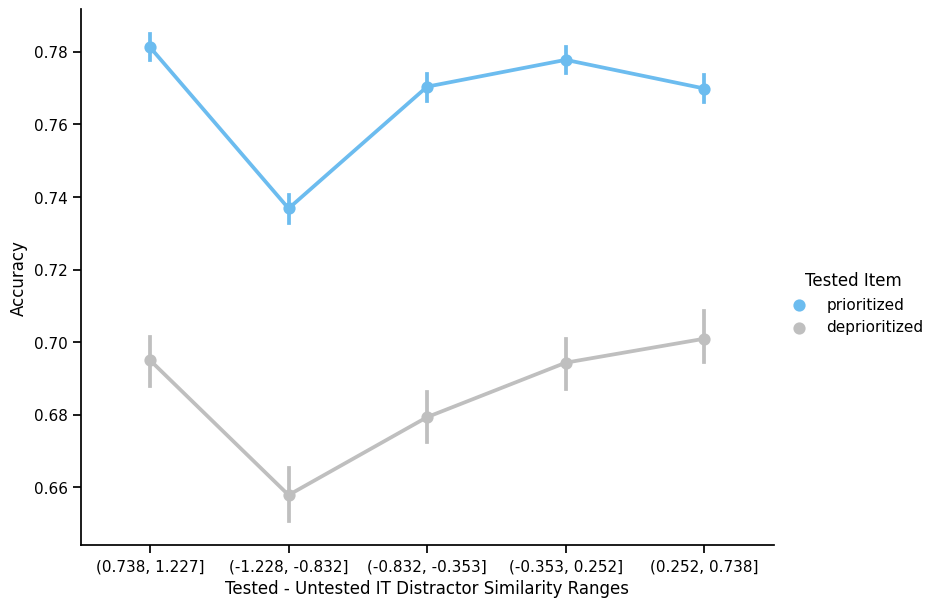

In [41]:

sns.catplot(
    data=df,
    x='Tested - Untested IT Distractor Similarity Ranges',
    y='Accuracy',
    hue='Tested Item',
#  col = 'pilot_type',
#     col='Retrocue Reliability',
#     col_order = ['low', 'high'],
    kind='point',
    ci=68,
    # palette=palette[::-1], 
    height=6,
    aspect=1.3
)

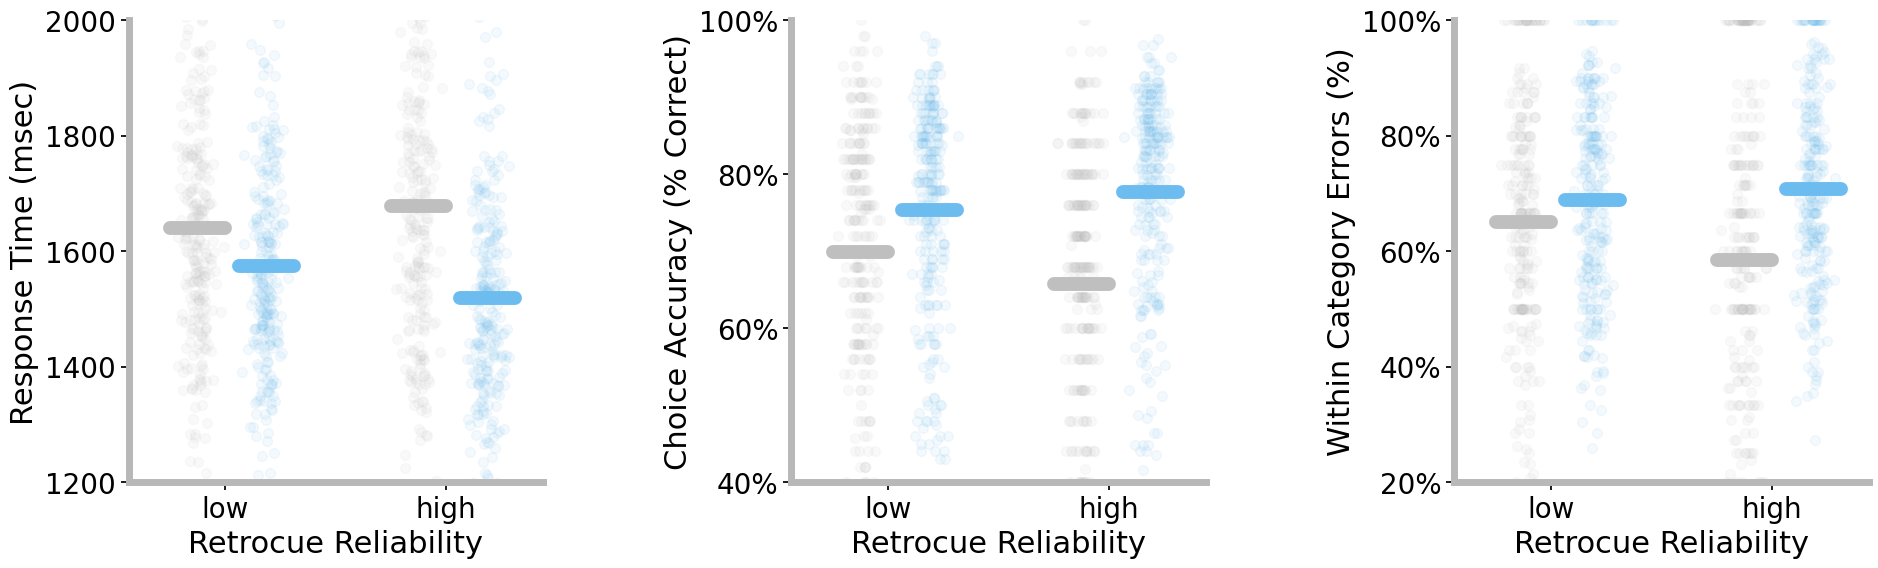

In [52]:
f, axes = plt.subplots(1, 3, figsize=(24, 6)) 
dhue = 'Tested Item'
dx = 'Retrocue Reliability'

dy_variables = [
    'WM RT',                 
    'Average Score',         
    'Average Error Score'   
]

y_axis_labels = [
    'Response Time (msec)',                           
    'Choice Accuracy (% Correct)',    
    'Within Category Errors (%)'      
]

data_sources = [
    avg_scores_table_rt,     # Subplot 1
    avg_scores_table,        # Subplot 2
    avg_scores_table_errors  # Subplot 3
]


colors = {'prioritized': blue, 'deprioritized': grey}

unique_x = sorted(data_sources[0][dx].unique(), reverse=True)
unique_hue = sorted(data_sources[0][dhue].unique())

color_palette = [colors.get(hue, blue) for hue in unique_hue]

spacing = 0.8
hue_offset = 0.25

# Create each subplot
for subplot_idx, ax in enumerate(axes):
    
    dy = dy_variables[subplot_idx]
    current_data = data_sources[subplot_idx]
    
    for i, x_val in enumerate(unique_x):
        for j, hue_val in enumerate(unique_hue):
            subset = current_data[(current_data[dx] == x_val) & 
                                 (current_data[dhue] == hue_val)]
            
            if len(subset) > 0:
                # Calculate x position with spacing
                x_pos = i * spacing + (j - len(unique_hue)/2 + 0.6) * hue_offset
                
                x_jitter = np.random.normal(x_pos, 0.03, len(subset))
                ax.scatter(x_jitter, subset[dy], 
                          color=color_palette[j], alpha=0.08, s=50, zorder=1)
                
                # Calculate and plot bold mean line
                mean_value = subset[dy].mean()
                ax.plot([x_pos - 0.1, x_pos + 0.1], [mean_value, mean_value], 
                       color=color_palette[j], linewidth=10, solid_capstyle='round', zorder=10)
   
    ax.set_xlim(-0.35, (len(unique_x) - 1) * spacing + 0.35)
    ax.set_xticks([i * spacing for i in range(len(unique_x))])
    ax.set_xticklabels(unique_x, fontsize=20)  
    ax.set_xlabel(dx, fontsize=22)  
    
    ax.set_ylabel(y_axis_labels[subplot_idx], fontsize=22)  
    ax.tick_params(axis='both', which='major', labelsize=20)  
    if subplot_idx == 0:  
        ax.set_ylim(1200, 2000)
        ax.set_yticks(np.arange(1200, 2001, 200))  # Step size of 100
    elif subplot_idx == 1:  
        ax.set_ylim(bottom=0.4, top = 1.0)  
        ax.set_yticks(np.arange(0.4, 1.001, 0.2))


        ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    elif subplot_idx == 2:  
        ax.set_ylim(bottom=0.2, top = 1.0)
        ax.set_yticks(np.arange(0.2, 1.01, 0.2))

        ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    
    ax.spines['bottom'].set_color('#B8B8B8')
    ax.spines['left'].set_color('#B8B8B8')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['left'].set_linewidth(5)

plt.subplots_adjust(wspace=0.6, right=0.85)
plt.show()